### Dataset used: Olympic Medals

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

### General info

In [69]:
try:
    olymplic_medals_df = pd.read_csv('resources/olympic-medals-1976-to-2008.csv')
    olymplic_medals_df.sample(10)
except FileNotFoundError:
    print('Error')

Error


In [15]:
olymplic_medals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15433 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.3+ MB


In [17]:
# Null values
olymplic_medals_df.isna().mean() * 100

City            0.758116
Year            0.758116
Sport           0.758116
Discipline      0.758116
Event           0.758116
Athlete         0.758116
Gender          0.758116
Country_Code    0.758116
Country         0.758116
Event_gender    0.758116
Medal           0.758116
dtype: float64

### Splitting column Athlete

In [34]:
olymplic_medals_df[['Last Name', 'Name']] = olymplic_medals_df['Athlete'].str.split(',', n=1, expand=True)
olymplic_medals_df['Name'] = olymplic_medals_df['Name'].str.lstrip()

In [35]:
olymplic_medals_df.head(10)

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal,Last Name,Name
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver,KÖHLER,Christa
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze,KOSENKOV,Aleksandr
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold,BOGGS,Philip George
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver,CAGNOTTO,Giorgio Franco
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze,WILSON,Deborah Keplar
5,Montreal,1976.0,Aquatics,Diving,10m platform,"LOUGANIS, Gregory",Men,USA,United States,M,Silver,LOUGANIS,Gregory
6,Montreal,1976.0,Aquatics,Diving,10m platform,"VAYTSEKHOVSKAYA, Elena",Women,URS,Soviet Union,W,Gold,VAYTSEKHOVSKAYA,Elena
7,Montreal,1976.0,Aquatics,Diving,3m springboard,"POTTER-MCINGVALE, Cynthia",Women,USA,United States,W,Bronze,POTTER-MCINGVALE,Cynthia
8,Montreal,1976.0,Aquatics,Diving,10m platform,"DIBIASI, Klaus",Men,ITA,Italy,M,Gold,DIBIASI,Klaus
9,Montreal,1976.0,Aquatics,Diving,10m platform,"ALEINIK, Vladimir",Men,URS,Soviet Union,M,Bronze,ALEINIK,Vladimir


### Athlete with most medals

In [45]:
olymplic_medals_df.groupby(by=['Athlete']).Medal.count().sort_values(ascending = False)

Athlete
PHELPS, Michael        16
FISCHER, Birgit        12
NEMOV, Alexei          12
TORRES, Dara           12
THOMPSON, Jenny        12
                       ..
JAANSON, Jueri          1
JAANSON, Juri           1
JABLKOWSKI, Piotr       1
JABRAILOV, Elmadi       1
ÖRSTED, Hans-Henrik     1
Name: Medal, Length: 11337, dtype: int64

### Athlete with most gold medals

In [46]:
olymplic_medals_df[olymplic_medals_df.Medal == 'Gold']

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal,Last Name,Name
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold,BOGGS,Philip George
6,Montreal,1976.0,Aquatics,Diving,10m platform,"VAYTSEKHOVSKAYA, Elena",Women,URS,Soviet Union,W,Gold,VAYTSEKHOVSKAYA,Elena
8,Montreal,1976.0,Aquatics,Diving,10m platform,"DIBIASI, Klaus",Men,ITA,Italy,M,Gold,DIBIASI,Klaus
11,Montreal,1976.0,Aquatics,Diving,3m springboard,"CHANDLER, Jennifer Kay",Women,USA,United States,W,Gold,CHANDLER,Jennifer Kay
12,Montreal,1976.0,Aquatics,Swimming,4x100m freestyle relay,"BABASHOFF, Shirley Farber",Women,USA,United States,W,Gold,BABASHOFF,Shirley Farber
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15422,Beijing,2008.0,Wrestling,Wrestling Gre-R,- 55kg,"MANKIEV, Nazyr",Men,RUS,Russia,M,Gold,MANKIEV,Nazyr
15423,Beijing,2008.0,Wrestling,Wrestling Gre-R,74 - 84kg,"MINGUZZI, Andrea",Men,ITA,Italy,M,Gold,MINGUZZI,Andrea
15429,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"KVIRKELIA, Manuchar",Men,GEO,Georgia,M,Gold,KVIRKELIA,Manuchar
15431,Beijing,2008.0,Wrestling,Wrestling Gre-R,60 - 66kg,"GUENOT, Steeve",Men,FRA,France,M,Gold,GUENOT,Steeve


In [59]:
gold_medals_athletes = olymplic_medals_df[olymplic_medals_df.Medal == 'Gold'].groupby('Athlete').Medal.count().sort_values(ascending=False)
gold_medals_athletes

Athlete
PHELPS, Michael           14
LEWIS, Carl                9
THOMPSON, Jenny            8
FISCHER, Birgit            8
BIONDI, Matthew            8
                          ..
ISHTIAQ, Ahmed             1
ISKANDARIAN, Mnatsakan     1
ITO, Sachiko               1
IVAN, Paula                1
ZÜLOW, Andreas             1
Name: Medal, Length: 4024, dtype: int64

In [48]:
gold_medals_athletes.values

array([14,  9,  8, ...,  1,  1,  1], dtype=int64)

In [49]:
gold_medals_athletes.index[:10]

Index(['PHELPS, Michael', 'LEWIS, Carl', 'THOMPSON, Jenny', 'FISCHER, Birgit',
       'BIONDI, Matthew', 'ANDRIANOV, Nikolay', 'OTTO, Kristin',
       'SCHERBO, Vitaly', 'VAN DYKEN, Amy', 'EGERSZEGI, Krisztina'],
      dtype='object', name='Athlete')

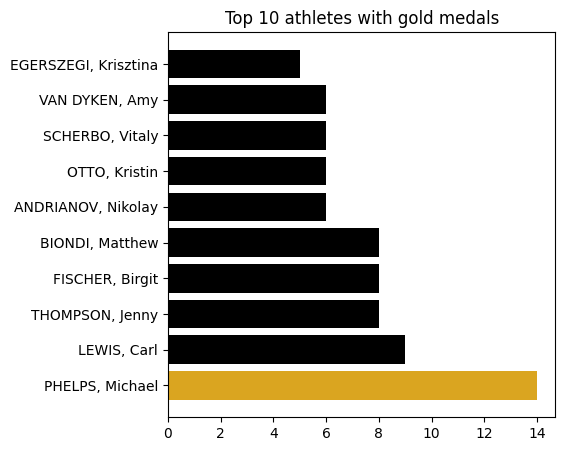

In [58]:
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
ax.barh(y=gold_medals_athletes.index[:10], data=gold_medals_athletes, width=gold_medals_athletes.values[:10], color='black')
ax.barh(y=gold_medals_athletes.index[:1], width=gold_medals_athletes.values[:1], color='goldenrod')
ax.set_title(label='Top 10 athletes with gold medals')
plt.show()

### Resharping: applying melt() method

In [61]:
# Selection of columns
olymplic_info_df = olymplic_medals_df[['Athlete', 'Country', 'Sport', 'Medal']]
olymplic_info_df

,Athlete,Country,Sport,Medal
0,"KÖHLER, Christa",East Germany,Aquatics,Silver
1,"KOSENKOV, Aleksandr",Soviet Union,Aquatics,Bronze
2,"BOGGS, Philip George",United States,Aquatics,Gold
3,"CAGNOTTO, Giorgio Franco",Italy,Aquatics,Silver
4,"WILSON, Deborah Keplar",United States,Aquatics,Bronze
...,...,...,...,...
15428,"GUENOT, Christophe",France,Wrestling,Bronze
15429,"KVIRKELIA, Manuchar",Georgia,Wrestling,Gold
15430,"RAHIMOV, Vitaliy",Azerbaijan,Wrestling,Silver
15431,"GUENOT, Steeve",France,Wrestling,Gold


In [63]:
melt_df = pd.melt(olymplic_info_df, id_vars='Athlete', value_vars=['Country', 'Sport', 'Medal'])
melt_df

,Athlete,variable,value
0,"KÖHLER, Christa",Country,East Germany
1,"KOSENKOV, Aleksandr",Country,Soviet Union
2,"BOGGS, Philip George",Country,United States
3,"CAGNOTTO, Giorgio Franco",Country,Italy
4,"WILSON, Deborah Keplar",Country,United States
...,...,...,...
46294,"GUENOT, Christophe",Medal,Bronze
46295,"KVIRKELIA, Manuchar",Medal,Gold
46296,"RAHIMOV, Vitaliy",Medal,Silver
46297,"GUENOT, Steeve",Medal,Gold
